# Chern Numbers of (rational)fractionally filled 1d Charge Density Wave Insulators

Saumya Biswas (saumyab@uoregon.edu)

1d Charge Density Waves(CDW) are broken symmetry states with interesting topological properties. In a 1d lattice with CDW instability, the "translation-by-1-lattice-cell symmetry" is spontaneously broken and a periodic charge density with a wave-vector corresponding to the chage filling sets in. For rational filling(the period of the charge density being an integer multiple of the lattice constant), a Reduced Brillouin Zone(RBZ) can be defined with bands of the original Brillouin Zone folded into the reduced zone (ref [1]).

The modulus of the order parameter of the CDW is $|\Delta| = \langle c_i^{\dagger} c_i \rangle = A cos(2\pi n/N)$

CDWs can be made to 'slide' or move across the spatial dimension by continuously varying the complex phase($\phi$) of the order parameter $\bf{\Delta}=|\Delta|e^{i\phi}$. Changing $\phi$ by $2 \pi$ moves the order parameter back into itself. A two dimensional parameter space can be obtained for discrete values of wave-vector $\bf{k}$ and phase $\phi$. The Berry curvature in the 2d parameter space of $(\bf{k}, \phi)$ shows divergences indicating non-trivial topology.

In this notebook, we demonstrante the calculation of the Chern numbers in the gaps of a (p/q) filled Charge Density Waves for the (1/3) case i.e. p=1, q=3.

In [143]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

In [160]:
ntheta = 100
nphi = 100
q = 2

In [161]:
thetas = np.linspace(0, np.pi, ntheta)
phis = np.linspace(0, 2*np.pi, nphi)
print(thetas)
print(phis)

[0.         0.03173326 0.06346652 0.09519978 0.12693304 0.1586663
 0.19039955 0.22213281 0.25386607 0.28559933 0.31733259 0.34906585
 0.38079911 0.41253237 0.44426563 0.47599889 0.50773215 0.53946541
 0.57119866 0.60293192 0.63466518 0.66639844 0.6981317  0.72986496
 0.76159822 0.79333148 0.82506474 0.856798   0.88853126 0.92026451
 0.95199777 0.98373103 1.01546429 1.04719755 1.07893081 1.11066407
 1.14239733 1.17413059 1.20586385 1.23759711 1.26933037 1.30106362
 1.33279688 1.36453014 1.3962634  1.42799666 1.45972992 1.49146318
 1.52319644 1.5549297  1.58666296 1.61839622 1.65012947 1.68186273
 1.71359599 1.74532925 1.77706251 1.80879577 1.84052903 1.87226229
 1.90399555 1.93572881 1.96746207 1.99919533 2.03092858 2.06266184
 2.0943951  2.12612836 2.15786162 2.18959488 2.22132814 2.2530614
 2.28479466 2.31652792 2.34826118 2.37999443 2.41172769 2.44346095
 2.47519421 2.50692747 2.53866073 2.57039399 2.60212725 2.63386051
 2.66559377 2.69732703 2.72906028 2.76079354 2.7925268  2.824260

In [162]:
k1points = len(thetas); k2points = len(phis)
parameter_space = np.meshgrid(thetas, phis)

In [163]:
thetaA = parameter_space[0]
phiA = parameter_space[1]        
vecs_ks=np.zeros((k1points,k2points,q,q),dtype=complex)
print(vecs_ks.shape)

(100, 100, 2, 2)


In [164]:
for ks in range(k1points):                # sweep over theta
    for kt in range(k2points):            # sweep over phi        
        theta = thetaA[kt,ks];  phi = phiA[kt,ks];
        H = np.zeros( (2, 2),dtype=complex)

        H = sigmax() * np.sin(theta) * np.cos(phi) + sigmay() * np.sin(theta) * np.sin(phi) + np.cos(theta) * sigmaz()

        (vals, vecs)=np.linalg.eigh(H)
        vecs=vecs * np.e**(-1.0j * phi)
        vecs = vecs.T        
        vecs_ks[ks,kt,:,:] = vecs[:,:]

In [165]:
max_occ = 1
occ_bnds = np.zeros((k1points,k2points,max_occ,2),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i+1,:]
print(occ_bnds.shape)

(100, 100, 1, 2)


0.0010072955363496221
(99, 99)


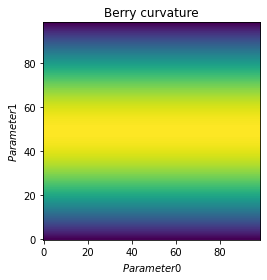

[  626.3348014    882.66889686   933.96546375   955.95922962
   968.17629539   975.94197688   981.30448466   985.21965992
   988.19354349   990.51911163   992.37773391   993.8876963
   995.12943281   996.15954286   997.01900796   997.73822748
   998.34022289   998.84274305   999.2596864    999.60208515
   999.87880117  1000.09702719  1000.26265405  1000.38054386
  1000.45473575  1000.48860296  1000.48497385  1000.44622617
  1000.37436102  1000.27106132  1000.13773836   999.97556895
   999.78552527   999.5683988    999.32481959   999.0552716
   998.76010503   998.43954589   998.09370343   997.72257569
   997.3260534    996.90392238   996.45586469   995.98145854
   995.48017707   994.95138598   994.39434007   993.80817868
   993.19191991   992.54445365   991.8645332    991.15076547
   990.40159952   989.61531325   988.78999801   987.92354084
   987.01360387   986.05760067   985.05266876   983.9956378
   982.88299265   981.71083035   980.47480986   979.17009311
   977.79127572   976.33230

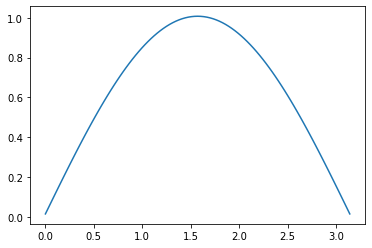

[0.00000000e+00 1.58639667e-02 3.17119598e-02 4.75280217e-02
 6.32962268e-02 7.90006980e-02 9.46256222e-02 1.10155266e-01
 1.25573994e-01 1.40866278e-01 1.56016723e-01 1.71010072e-01
 1.85831228e-01 2.00465268e-01 2.14897456e-01 2.29113261e-01
 2.43098368e-01 2.56838696e-01 2.70320409e-01 2.83529932e-01
 2.96453965e-01 3.09079493e-01 3.21393805e-01 3.33384500e-01
 3.45039506e-01 3.56347086e-01 3.67295854e-01 3.77874787e-01
 3.88073232e-01 3.97880920e-01 4.07287976e-01 4.16284927e-01
 4.24862715e-01 4.33012702e-01 4.40726682e-01 4.47996887e-01
 4.54815998e-01 4.61177147e-01 4.67073930e-01 4.72500409e-01
 4.77451121e-01 4.81921079e-01 4.85905784e-01 4.89401223e-01
 4.92403877e-01 4.94910721e-01 4.96919232e-01 4.98427388e-01
 4.99433670e-01 4.99937064e-01 4.99937064e-01 4.99433670e-01
 4.98427388e-01 4.96919232e-01 4.94910721e-01 4.92403877e-01
 4.89401223e-01 4.85905784e-01 4.81921079e-01 4.77451121e-01
 4.72500409e-01 4.67073930e-01 4.61177147e-01 4.54815998e-01
 4.47996887e-01 4.407266

In [170]:
plot_berry_curvature(occ_bnds)
b = berry_curvature(occ_bnds)
print(np.max(b))
print(b.shape)
plt.show()
print(np.sin(np.linspace(1/ntheta, np.pi*(1 + 1/ntheta), ntheta - 1))/b[:, 0])
print(b[:, 0] * 992.75730301 - thetas[:-1])
plt.plot(np.linspace(0, np.pi, ntheta-1), 1000*b[:, 0])
plt.show()
print(0.5*np.sin(thetas))

In [73]:
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

The Chern number is:
1.0000000000000004


Therefore, the Chern number in the bandgap above the lowest band is 1.

The Chern number is:
-5.093699863815549e-16
The chern nuber of two filled bands is 0. Nonzero chern number can be found in the gap. The only gap is between the two bands.
To calculate the chern numbers of 1 filled band, the number of occupied band(max_occ) would be 1.
(50, 50, 1, 2)
The Chern number is:
1.0000000000000002
All columns of b_curv should be proportional to sin(	heta)


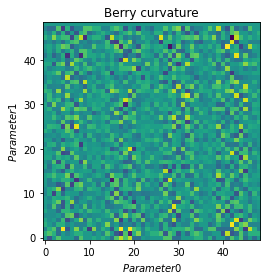

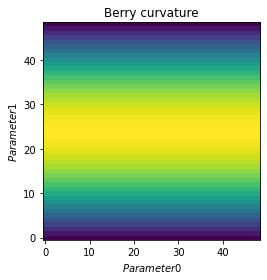

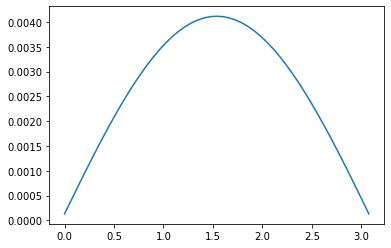

All rows of b_curv should be constant


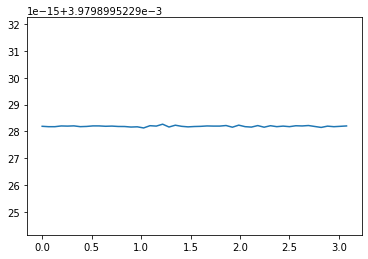

In [153]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 25 01:17:26 2019

@author: ssaumya7
"""
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


N = 50
thetas = np.linspace(0, np.pi, N)
phis = np.linspace(0, 2*np.pi, N)
eigfs = np.zeros((N, N, 2, 2), dtype=complex)
for i in range(N):
    for j in range(N):
        # H = B.sigma, sigma is vector of Pauli matrices
        H = sigmax() * np.sin(thetas[i]) * np.cos(phis[j]) + sigmay() * np.sin(thetas[i]) * np.sin(phis[j]) + np.cos(thetas[i]) * sigmaz()
        H = -H             #Figure this out please
        _, eigs = np.linalg.eigh(H)
        eigs=eigs.T        # the eigenvectors need to be rows in eigfs
        eigfs[i, j, :, :] = eigs[:, :]
b_curv = berry_curvature(eigfs)
plot_berry_curvature(eigfs)

print('The Chern number is:')
print(b_curv.sum()/2/np.pi )
print('The chern nuber of two filled bands is 0. Nonzero chern number can be found in the gap. The only gap is between the two bands.')
print('To calculate the chern numbers of 1 filled band, the number of occupied band(max_occ) would be 1.')


max_occ = 1
occ_bnds = np.zeros((N,N,max_occ,2),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = eigfs[:,:,i,:]

print(np.shape(occ_bnds))  

b_curv = berry_curvature(occ_bnds)
plot_berry_curvature(occ_bnds)
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )


print('All columns of b_curv should be proportional to sin(\theta)')
sinn = b_curv[:,1]
fig, ax = subplots()
ax.plot(thetas[0:N-1], b_curv[:,5]);
show()

print('All rows of b_curv should be constant')
fig, ax = subplots()
ax.plot(thetas[0:N-1], b_curv[20,:]);
show()



In [11]:
max_occ = 3
occ_bnds = np.zeros((k1points,k2points,max_occ,3),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i,:]
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

The Chern number is:
-2.0403523087557085e-16


After, subsequent calculation of the Chern number in the gaps over the middle band and the topmost band, we
can conclude thee Chern numbers in the three gaps are ${1, -2, 1}$ respectively.

### References
[1] Flicker, Felix. The Geometry and Topology of Change-ordered Quantum Fields in Low-dimensional Systems. Diss. University of Bristol, 2015.
http://www.felixflicker.com/pdf/papers/FLICKER_PhD_Thesis.pdf

In [76]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [77]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
